<a href="https://colab.research.google.com/github/FacuRoffet99/PDI/blob/main/practico_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico 3 - Procesamiento Digital de Imágenes

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

In [ ]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

def plot_hist(im, bins, ax, cumulative=False):
    counts, borders = np.histogram(im if im.ndim==2 else rgb2yiq(im)[...,0], bins=bins, range=(0,1))
    ax.bar(range(len(counts)), np.cumsum(counts) if cumulative else counts)
    plt.xticks(ax.get_xticks(), labels=np.round(ax.get_xticks()/bins,2))
    plt.grid(alpha=0.3)

Text(0.5, 1.0, 'Histograma')

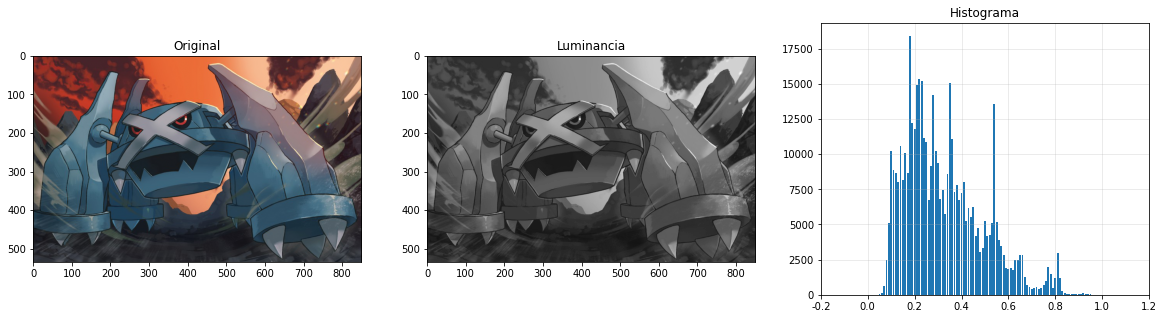

In [ ]:
url = 'https://cdn.donmai.us/sample/a9/79/sample-a979b580d4d5869772b302fc71375651.jpg'

img_rgb = imageio.imread(url)/255
img_gray = rgb2yiq(img_rgb)[:,:,0]

fig, axes = plt.subplots(1, 3, figsize=(20,5))
axes[0].imshow(img_rgb, vmin=0, vmax=1)
axes[0].set_title('Original')
axes[1].imshow(img_gray, 'gray', vmin=0, vmax=1)
axes[1].set_title('Luminancia')
plot_hist(img_rgb, 100, axes[2])
axes[2].set_title('Histograma')

# 1. Normalizar histograma al rango [0,1]

Definir una función que normalice el histograma de valores de la imagen al rango [0,1]. Si la imagen es RGB, debe normalizar el histograma de luminancias.

In [ ]:
def norm_hist_range(im, percentiles=False):

  # Chequear si es RGB o escala de grises
  if im.ndim == 3:
    im = rgb2yiq(im)
    old_y = im[:,:,0]
  else: 
    old_y = im

  # Definir valor mínimo y máximo
  if percentiles:
    min = np.percentile(old_y, 2)
    max = np.percentile(old_y, 98)
  else:
    min = np.min(old_y)
    max = np.max(old_y)

  # Normalizar a [0,1]
  new_y = np.zeros(im.shape[0:2])   # matriz de ceros
  new_y[old_y>=max] = 1             # relleno con unos donde corresponde
  new_y[(old_y>min) & (old_y<max)] = 1/(max-min) * (old_y[(old_y>min) & (old_y<max)] - min)   # interpolación en el resto

  # Devolver de la forma correcta
  if im.ndim == 3:
    im[:,:,0] = new_y
    return yiq2rgb(im)
  else: 
    return new_y

Text(0.5, 1.0, 'Histograma')

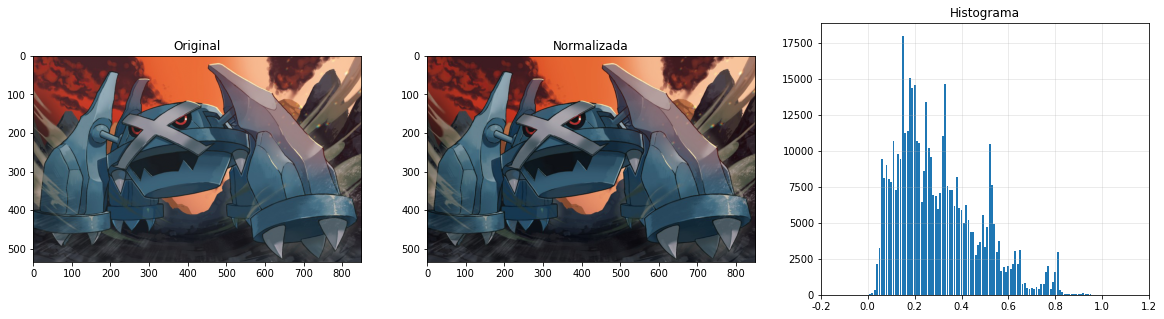

In [ ]:
# Caso RGB
img_edited = norm_hist_range(img_rgb)

fig, axes = plt.subplots(1, 3, figsize=(20,5))
axes[0].imshow(img_rgb, vmin=0, vmax=1)
axes[0].set_title('Original')
axes[1].imshow(np.clip(img_edited,0,1), vmin=0, vmax=1)
axes[1].set_title('Normalizada')
plot_hist(img_edited, 100, axes[2])
axes[2].set_title('Histograma')

Text(0.5, 1.0, 'Histograma')

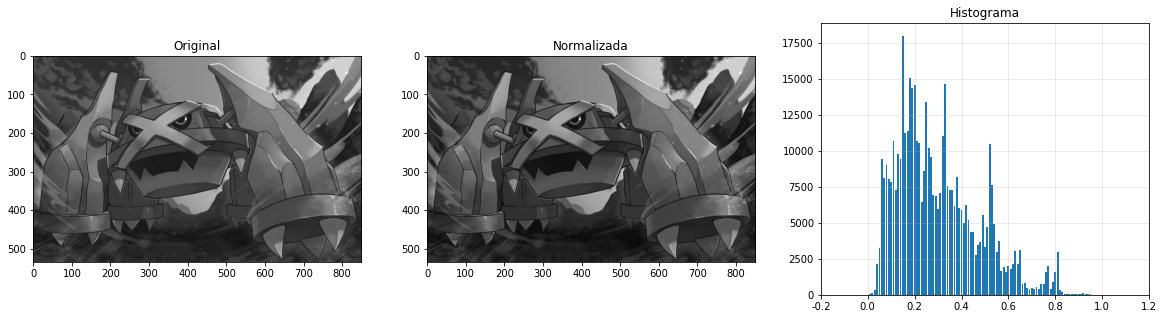

In [ ]:
# Caso escala de grises
img_edited = norm_hist_range(img_gray)

fig, axes = plt.subplots(1, 3, figsize=(20,5))
axes[0].imshow(img_gray, 'gray', vmin=0, vmax=1)
axes[0].set_title('Original')
axes[1].imshow(np.clip(img_edited,0,1), 'gray', vmin=0, vmax=1)
axes[1].set_title('Normalizada')
plot_hist(img_edited, 100, axes[2])
axes[2].set_title('Histograma')

# 2 Normalizar histograma usando percentiles

Definir una función que normalice el histograma de valores de la imagen de modo que el pixel del percentil P valga 0 y el pixel del percentil 100-P valga 1. Los valores entre los percentiles 0 y P valdrán 0 y los valores entre los percentiles 100-P y 100 valdrán 1. Si la imagen es RGB, normalizar el histograma de luminancias.

NOTA: para calcular percentiles usar np.percentile()

Text(0.5, 1.0, 'Histograma')

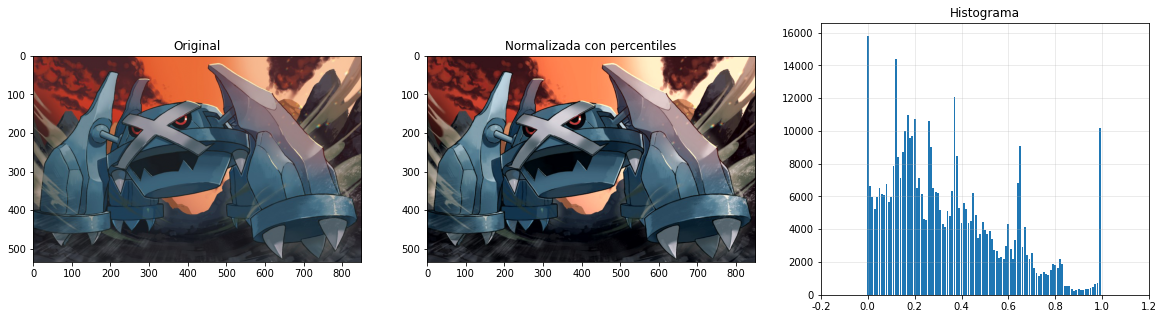

In [ ]:
# Caso RGB
img_edited = norm_hist_range(img_rgb, percentiles=True)

fig, axes = plt.subplots(1, 3, figsize=(20,5))
axes[0].imshow(img_rgb, vmin=0, vmax=1)
axes[0].set_title('Original')
axes[1].imshow(np.clip(img_edited,0,1), vmin=0, vmax=1)
axes[1].set_title('Normalizada con percentiles')
plot_hist(img_edited, 100, axes[2])
axes[2].set_title('Histograma')

Text(0.5, 1.0, 'Histograma')

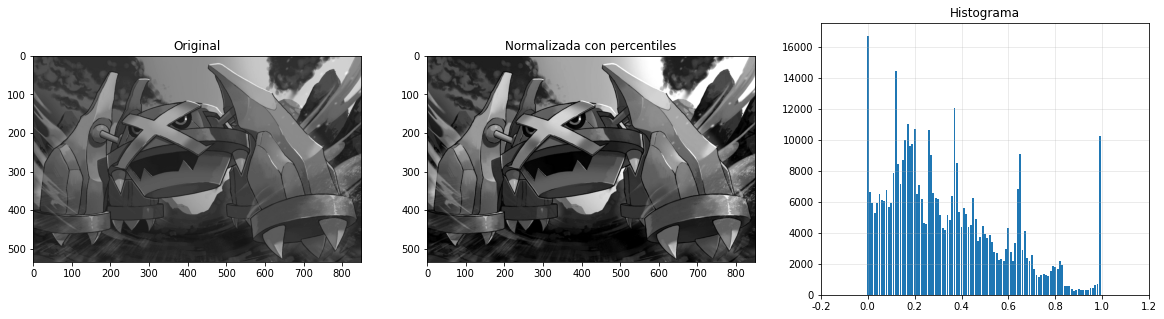

In [ ]:
# Caso escala de grises
img_edited = norm_hist_range(img_gray, percentiles=True)

fig, axes = plt.subplots(1, 3, figsize=(20,5))
axes[0].imshow(img_gray, 'gray', vmin=0, vmax=1)
axes[0].set_title('Original')
axes[1].imshow(np.clip(img_edited,0,1), 'gray', vmin=0, vmax=1)
axes[1].set_title('Normalizada con percentiles')
plot_hist(img_edited, 100, axes[2])
axes[2].set_title('Histograma')

## 2. Corrección gamma

1. Definir una función que aplique la corrección gamma a una imagen. Si la imagen es RGB, debe aplicar la corrección sobre la luminosidad de la imagen.
2. Normalizar la imagen al rango [0,1] (con min y max o con percentiles) y luego aplicar corrección gamma.


Como sugerencia, pasarle como parámetro un valor $\alpha$ de manera que $\gamma$ se calcule como:

$\gamma = 2^{\alpha}$

De esta manera, cuando $\alpha=1 \rightarrow \gamma=1/2$, y cuando $\alpha=-1 \rightarrow \gamma=2$. Entonces, para $\alpha>0$ la luminosidad aumenta y para $\alpha<0$ disminuye.

In [ ]:
def gamma_correction(im, alpha, percentiles=False):

  # Normalizar a [0,1]
  im = norm_hist_range(im, percentiles)

  # Chequear si es RGB o escala de grises
  if im.ndim == 3:
    im = rgb2yiq(im)
    old_y = im[:,:,0]
  else: 
    old_y = im

  # Corrección gamma
  new_y = 2**alpha * old_y

  # Devolver de la forma correcta
  if im.ndim == 3:
    im[:,:,0] = new_y
    return yiq2rgb(im)
  else: 
    return new_y

Text(0.5, 1.0, 'Histograma')

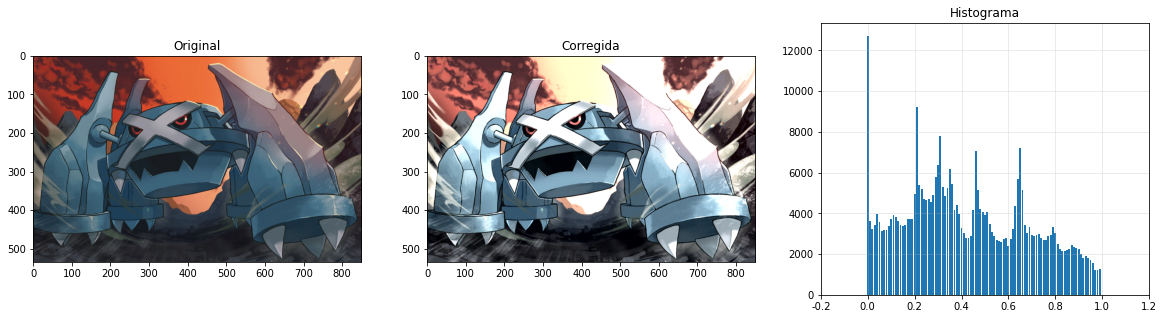

In [ ]:
# Caso mayor luminosidad
img_edited = gamma_correction(img_rgb, 0.8, True)

fig, axes = plt.subplots(1, 3, figsize=(20,5))
axes[0].imshow(img_rgb, vmin=0, vmax=1)
axes[0].set_title('Original')
axes[1].imshow(np.clip(img_edited,0,1), vmin=0, vmax=1)
axes[1].set_title('Corregida')
plot_hist(img_edited, 100, axes[2])
axes[2].set_title('Histograma')

Text(0.5, 1.0, 'Histograma')

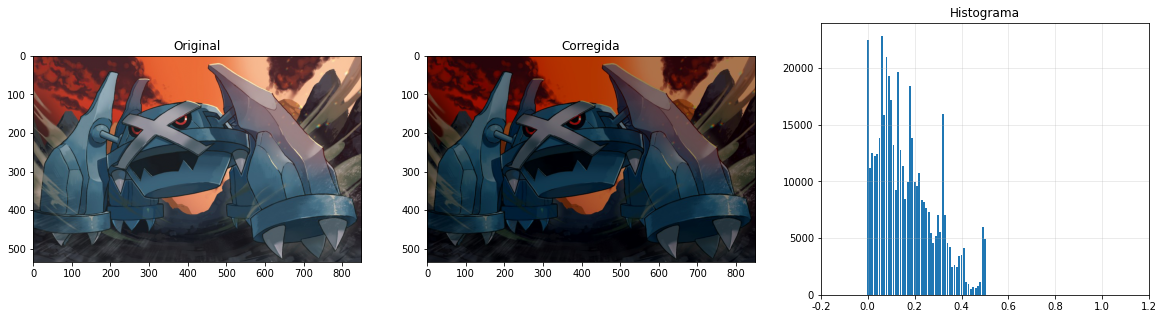

In [ ]:
# Caso menor luminosidad
img_edited = gamma_correction(img_rgb, -1, True)

fig, axes = plt.subplots(1, 3, figsize=(20,5))
axes[0].imshow(img_rgb, vmin=0, vmax=1)
axes[0].set_title('Original')
axes[1].imshow(np.clip(img_edited,0,1), vmin=0, vmax=1)
axes[1].set_title('Corregida')
plot_hist(img_edited, 100, axes[2])
axes[2].set_title('Histograma')

# 3. Modificación del histograma por una función definida a tramos

1. Definir una función que tome una imagen y dos arreglos $x$ e $y$ que definan una función no-lineal en el rango $0\leq x,y\leq 1$ y aplique la función a la intensidad de los pixeles de la imagen. Si la imagen es RGB debe aplicar la función a la luminosidad de la imagen.
2. Normalizar la imagen al rango [0,1] y luego aplicar la función a tramos.

Ayuda: La función np.interp() puede facilitarle la tarea

In [ ]:
def piecewise_correction(im, x, fx, percentiles=False):

  # Normalizar a [0,1]
  im = norm_hist_range(im, percentiles)

  # Chequear si es RGB o escala de grises
  if im.ndim == 3:
    im = rgb2yiq(im)
    old_y = im[:,:,0]
  else: 
    old_y = im

  # Aplicar función a tramos
  new_y = np.interp(old_y, x, fx)

  # Devolver de la forma correcta
  if im.ndim == 3:
    im[:,:,0] = new_y
    return yiq2rgb(im)
  else: 
    return new_y

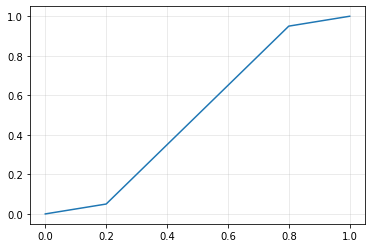

In [ ]:
# Caso de compresión de luminosidades altas y bajas
x = np.array([0, 0.2,  0.8,  1])
y = np.array([0, 0.05, 0.95, 1])
plt.plot(x,y)
plt.grid(alpha=0.3)

Text(0.5, 1.0, 'Histograma')

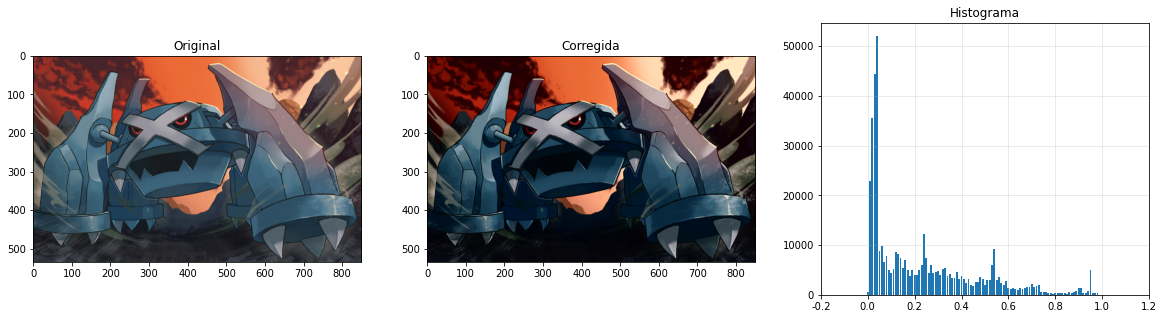

In [ ]:
# Caso de compresión de luminosidades altas y bajas
img_edited = piecewise_correction(img_rgb, x, y)

fig, axes = plt.subplots(1, 3, figsize=(20,5))
axes[0].imshow(img_rgb, vmin=0, vmax=1)
axes[0].set_title('Original')
axes[1].imshow(np.clip(img_edited,0,1), vmin=0, vmax=1)
axes[1].set_title('Corregida')
plot_hist(img_edited, 100, axes[2])
axes[2].set_title('Histograma')

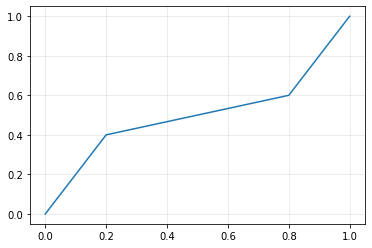

In [ ]:
# Caso de compresión de luminosidades medias
x = np.array([0, 0.2, 0.8, 1])
y = np.array([0, 0.4, 0.6, 1])
plt.plot(x,y)
plt.grid(alpha=0.3)

Text(0.5, 1.0, 'Histograma')

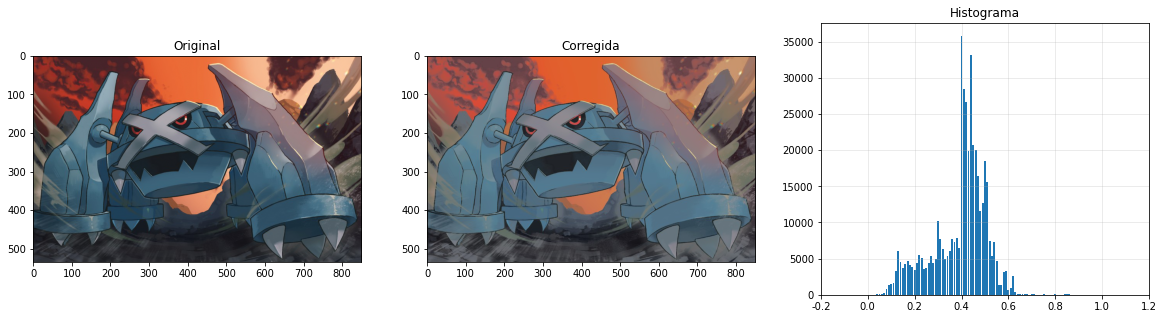

In [ ]:
# Caso de compresión de luminosidades medias
img_edited = piecewise_correction(img_rgb, x, y)

fig, axes = plt.subplots(1, 3, figsize=(20,5))
axes[0].imshow(img_rgb, vmin=0, vmax=1)
axes[0].set_title('Original')
axes[1].imshow(np.clip(img_edited,0,1), vmin=0, vmax=1)
axes[1].set_title('Corregida')
plot_hist(img_edited, 100, axes[2])
axes[2].set_title('Histograma')

# 4. Uniformalización del histograma

1. Definir una función que tome una imagen y haga que su histograma de intensidades tenga una distribución uniforme. 
2. Normalizar el histograma al rango [0,1] y uniformalizar su distribución

In [ ]:
def hist_equalization(im, res=256, percentiles=False):

  # Normalizar a [0,1]
  im = norm_hist_range(im, percentiles)

  # Chequear si es RGB o escala de grises
  if im.ndim == 3:
    im = rgb2yiq(im)
    old_y = im[:,:,0]
  else: 
    old_y = im

  # Obtener histograma
  pdf, _ = np.histogram(old_y, bins=res, range=(0,1))
 
  # Obtener histograma acumulado
  cdf = np.cumsum(pdf)

  # Ecualizar histograma
  cdf_equalized = np.round((cdf-cdf.min())*(res-1) / (cdf.max()-cdf.min()))

  # Mappear a los píxeles de la imagen
  new_y = cdf_equalized[((res-1)*old_y).astype('uint8')]/(res-1)

  # Devolver de la forma correcta
  if im.ndim == 3:
    im[:,:,0] = new_y
    return yiq2rgb(im)
  else: 
    return new_y

Text(0.5, 1.0, 'Histograma')

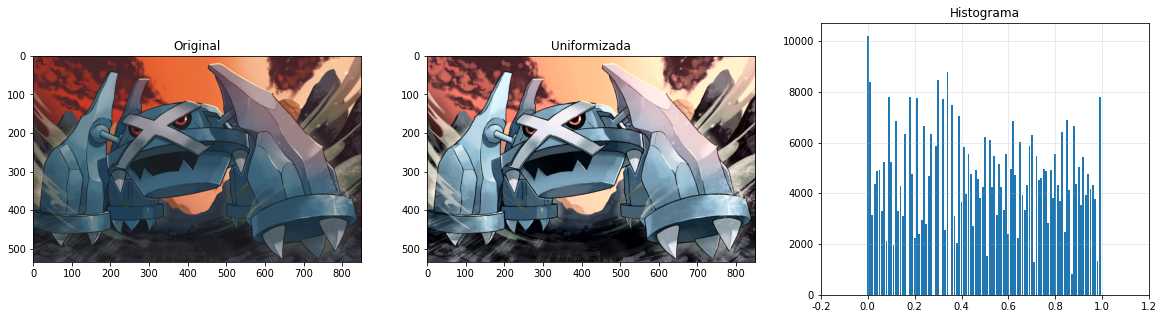

In [ ]:
# Caso RGB
img_edited = hist_equalization(img_rgb, percentiles=True)

fig, axes = plt.subplots(1, 3, figsize=(20,5))
axes[0].imshow(img_rgb, vmin=0, vmax=1)
axes[0].set_title('Original')
axes[1].imshow(np.clip(img_edited,0,1), vmin=0, vmax=1)
axes[1].set_title('Uniformizada')
plot_hist(img_edited, 100, axes[2])
axes[2].set_title('Histograma')

Text(0.5, 1.0, 'Histograma')

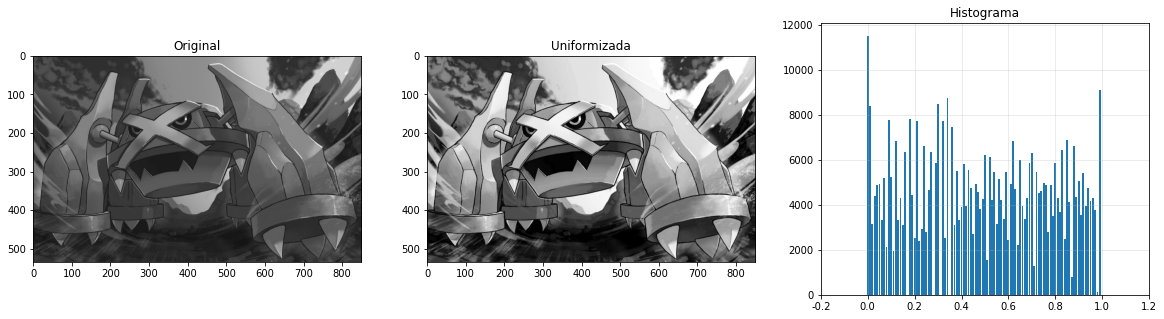

In [ ]:
# Caso escala de grises
img_edited = hist_equalization(img_gray, percentiles=True)

fig, axes = plt.subplots(1, 3, figsize=(20,5))
axes[0].imshow(img_gray, 'gray', vmin=0, vmax=1)
axes[0].set_title('Original')
axes[1].imshow(np.clip(img_edited,0,1), 'gray', vmin=0, vmax=1)
axes[1].set_title('Uniformizada')
plot_hist(img_edited, 100, axes[2])
axes[2].set_title('Histograma')

# 5. Normalización del histograma

1. Definir una función que tome una imagen y haga que su histograma de intensidades tenga una distribución normal. 
2. Normalizar el histograma al rango [0,1] y normalizar su distribución.

In [ ]:
from scipy.stats import norm

def hist_normalization(im, res=256, percentiles=False):

  # Normalizar a [0,1]
  im = norm_hist_range(im, percentiles)

  # Chequear si es RGB o escala de grises
  if im.ndim == 3:
    im = rgb2yiq(im)
    old_y = im[:,:,0]
  else: 
    old_y = im

  # Obtener histograma
  pdf, _ = np.histogram(old_y, bins=res, range=(0,1))
 
  # Obtener histograma acumulado
  cdf = np.cumsum(pdf)

  # Ecualizar histograma (norm.ppf es la función inversa a la cdf de la distribución normal)
  cdf_equalized = np.round(norm.ppf(cdf/cdf.max(), loc=0.5, scale=0.2)*(res-1))
  cdf_equalized = np.clip(cdf_equalized, 0, res-1)

  # Mappear a los píxeles de la imagen
  new_y = cdf_equalized[((res-1)*old_y).astype('uint8')]/(res-1)

  # Devolver de la forma correcta
  if im.ndim == 3:
    im[:,:,0] = new_y
    return yiq2rgb(im)
  else: 
    return new_y

Text(0.5, 1.0, 'Histograma')

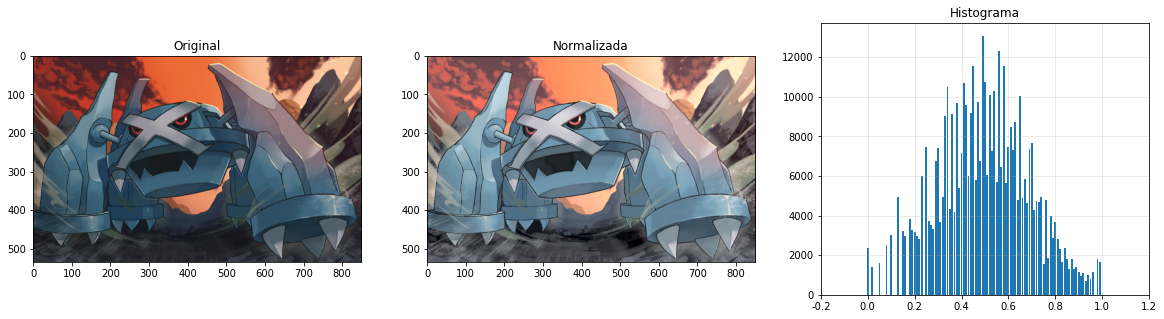

In [ ]:
# Caso RGB
img_edited = hist_normalization(img_rgb, percentiles=False)

fig, axes = plt.subplots(1, 3, figsize=(20,5))
axes[0].imshow(img_rgb, vmin=0, vmax=1)
axes[0].set_title('Original')
axes[1].imshow(np.clip(img_edited,0,1), vmin=0, vmax=1)
axes[1].set_title('Normalizada')
plot_hist(img_edited, 100, axes[2], False)
axes[2].set_title('Histograma')

Text(0.5, 1.0, 'Histograma')

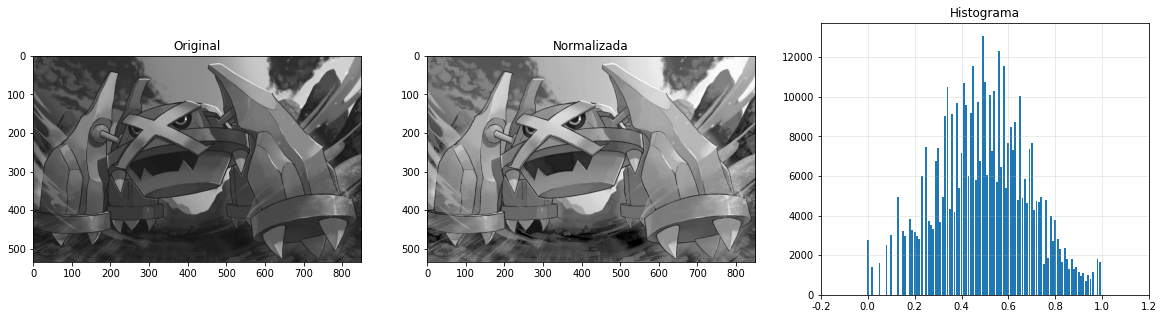

In [ ]:
# Caso escala de grises
img_edited = hist_normalization(img_gray, percentiles=False)

fig, axes = plt.subplots(1, 3, figsize=(20,5))
axes[0].imshow(img_gray, 'gray', vmin=0, vmax=1)
axes[0].set_title('Original')
axes[1].imshow(np.clip(img_edited,0,1), 'gray', vmin=0, vmax=1)
axes[1].set_title('Normalizada')
plot_hist(img_edited, 100, axes[2])
axes[2].set_title('Histograma')